In [1]:
#Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import pickle

In [2]:
data = pd.read_csv('Train.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
 data = data.fillna(data.mean().iloc[0])

C:\Users\Joshi\AppData\Local\Temp\ipykernel_9972\3617953675.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean().iloc[0])


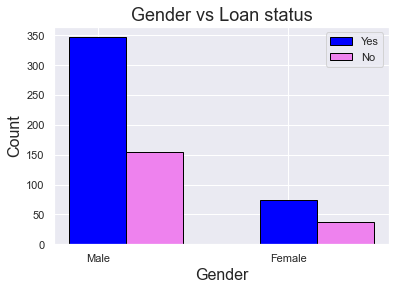

In [7]:
#Relationship between Gender and Loan Status:

Gender = ['Male', 'Female']
Loan_Status = ['Yes', 'No']
pos= np.arange(len(Gender))
bar_width= 0.30
Loan_Status_Yes= [347,75]
Loan_Status_NO= [155,37]

plt.bar(pos,Loan_Status_Yes,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='violet',edgecolor='black')
plt.xticks(pos, Gender)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Gender vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

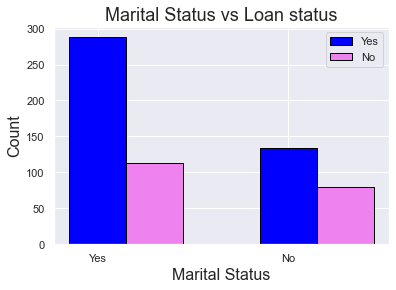

In [8]:
#Relationship between marital status vs loan status

MaritalStatus=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(MaritalStatus))
bar_width=0.30
Loan_Status_Yes=[288,134]
Loan_Status_NO=[113,79]

plt.bar(pos,Loan_Status_Yes,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='violet',edgecolor='black')
plt.xticks(pos, MaritalStatus)
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Marital Status vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

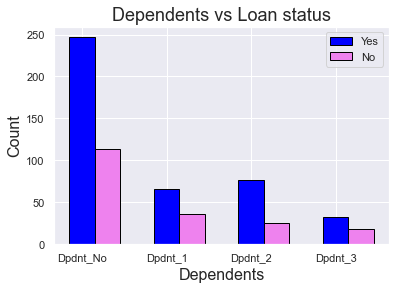

In [9]:
#Relationship between Dependents vs Loan status


Dependents=['Dpdnt_No', 'Dpdnt_1', 'Dpdnt_2', 'Dpdnt_3']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Dependents))
bar_width=0.30
Loan_Status_Yes=[247,66,76,33]
Loan_Status_NO=[113,36,25,18]

plt.bar(pos,Loan_Status_Yes,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='violet',edgecolor='black')
plt.xticks(pos, Dependents)
plt.xlabel('Dependents', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Dependents vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

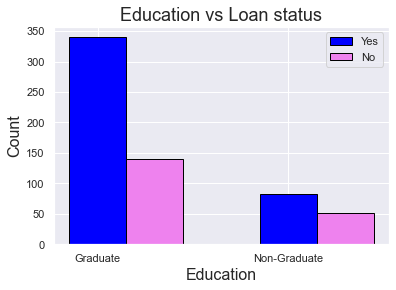

In [10]:
#Relationship between education vs Loan status:


Education=['Graduate', 'Non-Graduate']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Education))
bar_width=0.30
Loan_Status_Yes=[340,82]
Loan_Status_NO=[140,52]

plt.bar(pos,Loan_Status_Yes,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='violet',edgecolor='black')
plt.xticks(pos, Education)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Education vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

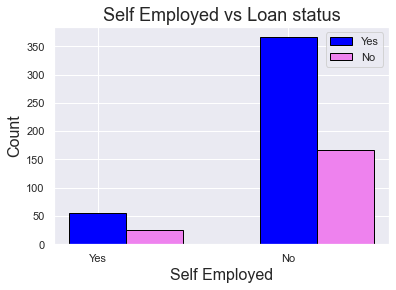

In [11]:
#Relationship between Self-Employed vs Loan_Status:

Self_Employed=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Self_Employed))
bar_width=0.30
Loan_Status_Yes=[56,366]
Loan_Status_NO=[26,166]

plt.bar(pos,Loan_Status_Yes,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='violet',edgecolor='black')
plt.xticks(pos, Self_Employed)
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Self Employed vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

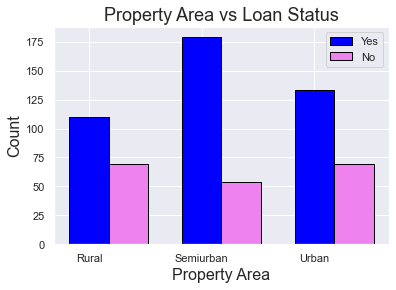

In [12]:
#Relationship between Property area and loan status

Property_Area=['Rural','Semiurban','Urban']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Property_Area))
bar_width=0.35
Loan_Status_Yes=[110,179,133]
Loan_Status_NO=[69,54,69]

plt.bar(pos,Loan_Status_Yes,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='violet',edgecolor='black')
plt.xticks(pos, Property_Area)
plt.xlabel('Property Area', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Property Area vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

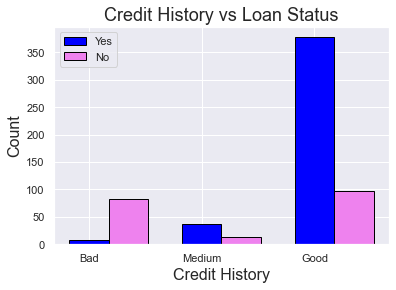

In [13]:
#Relationship between Credit History and Loan Status: 

Credit_History=['Bad','Medium','Good']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Credit_History))
bar_width=0.35
Loan_Status_Yes=[7,37,378]
Loan_Status_NO=[82,13,97]

plt.bar(pos,Loan_Status_Yes,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='violet',edgecolor='black')
plt.xticks(pos, Credit_History)
plt.xlabel('Credit History', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Credit History vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=2)
plt.show()

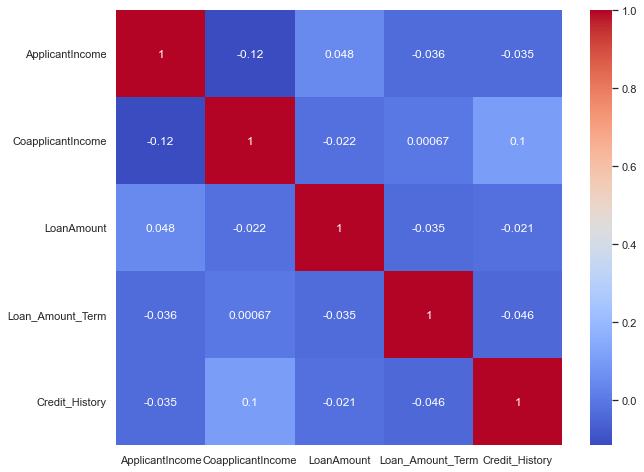

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm');

In [15]:
# print out column with unique values
for col in data.columns:
    if data[col].dtypes == 'object':
        num_of_unique_cat = len (data[col].unique())
        print("Features '{col_name}' has '{unique_cat}' unique categories". format(col_name=col, unique_cat=num_of_unique_cat))

Features 'Loan_ID' has '614' unique categories
Features 'Gender' has '3' unique categories
Features 'Married' has '3' unique categories
Features 'Dependents' has '5' unique categories
Features 'Education' has '2' unique categories
Features 'Self_Employed' has '3' unique categories
Features 'Property_Area' has '3' unique categories
Features 'Loan_Status' has '2' unique categories


In [16]:
data = data.drop(['Loan_ID','Dependents',], axis = 1)

In [17]:
data['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
data['Married'].replace({'Yes':1,'No':0},inplace=True)
data['Gender'].replace({'Male':1,'Female':0},inplace=True)
data['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
data['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
data['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [18]:
y = data['Loan_Status'] #target
X = data.drop('Loan_Status', axis = 1) #prediators

In [19]:
#Standardize the data - Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
model = LogisticRegression() #define the model
model.fit(X_train, y_train) #fit the model
ypred = model.predict(X_test) #predict on test sample
evaluation = f1_score(y_test, ypred)
evaluation

0.8365384615384616

In [22]:
pickle.dump(model,open('model.pkl','wb'))

In [23]:
model = pickle.load(open('model.pkl','rb'))
print(model)

LogisticRegression()
